<a href="https://colab.research.google.com/github/KimThanh-DA/ML---CHURN-PREDICTION/blob/main/K23_Tr%C6%B0%C6%A1ng_Kim_Thanh_Final_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import warnings
import time
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/churn_prediction - FINAL PROJECT.xlsx')
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.info() #check info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# Data này ổn, không có giá trị bị thiếu.

In [ ]:
df.duplicated().unique() #check giá trị trùng

array([False])

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [ ]:
#bước này chúng ta sẽ tính % 0 và 1 của cột Churn để biết được tỉ lệ rời bỏ của data

label_check = df['Churn'].value_counts(normalize=True)
label_check

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

In [ ]:
# Giá trị 0 chiếm 83.1% cho thấy lượng khách hàng hiện tại chiếm 83.1% bao gồm khách cũ và khách mới.
# Điều này cho thấy công ty có data tương đối ổn định.
# Giá trị 1 chiến 16.8% cho thấy lượng khách rời bỏ chiếm 16.8%.
# Điều này cho thấy công ty cần có các chiến dịch thu hút hơn đối với nhóm khách này.

In [ ]:
# tính order count theo churn
order_count_by_churn = df.groupby('Churn')['OrderCount'].sum()

print(order_count_by_churn)


Churn
0    13533.0
1     2626.0
Name: OrderCount, dtype: float64


In [ ]:
# tính % order count theo churn
total_order_count = order_count_by_churn.sum()
percentage_order_by_churn = (order_count_by_churn / total_order_count) * 100

print(percentage_order_by_churn)

Churn
0    83.748994
1    16.251006
Name: OrderCount, dtype: float64


**Ta thấy % số lượng order xấp xỉ % số lượng churn --> Cho thấy 2 biến này có tương quan với nhau.**


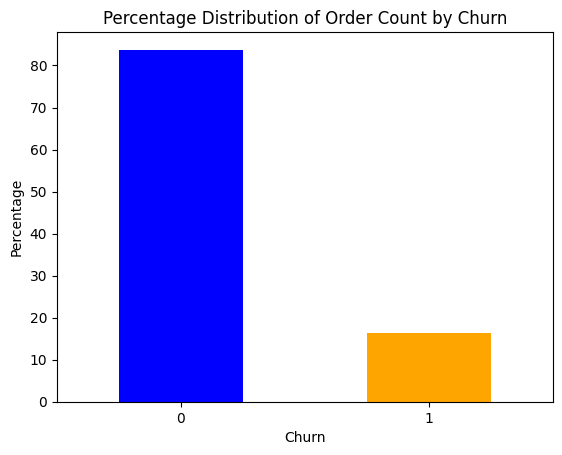

In [ ]:
# Vẽ biểu đồ cột thể hiện % order count theo churn
percentage_order_by_churn.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Order Count by Churn')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()

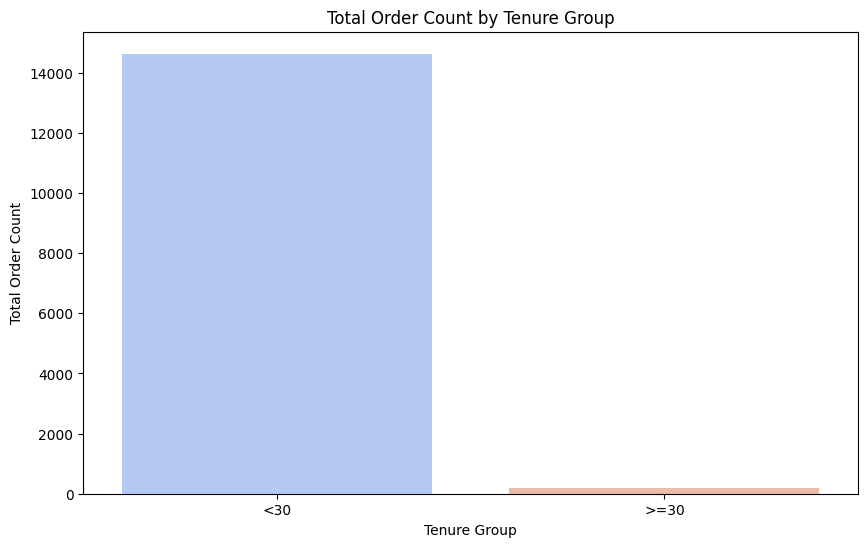

In [ ]:
# Chia Tenure theo nhóm < 30 và >= 30
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=[0, 30, float('inf')], labels=['<30', '>=30'])

# Tính tổng order theo Tenure
sum_order_count_tenure_group = df.groupby('Tenure_Group')['OrderCount'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

sns.barplot(data=sum_order_count_tenure_group, x='Tenure_Group', y='OrderCount', palette='coolwarm')
plt.title('Total Order Count by Tenure Group')
plt.ylabel('Total Order Count')
plt.xlabel('Tenure Group')
plt.show()


**Có thể thấy lượng order tập trung chủ yếu ở nhóm < 30. Nhóm người có tenure <30 có nhu cầu mua sắm cao.**

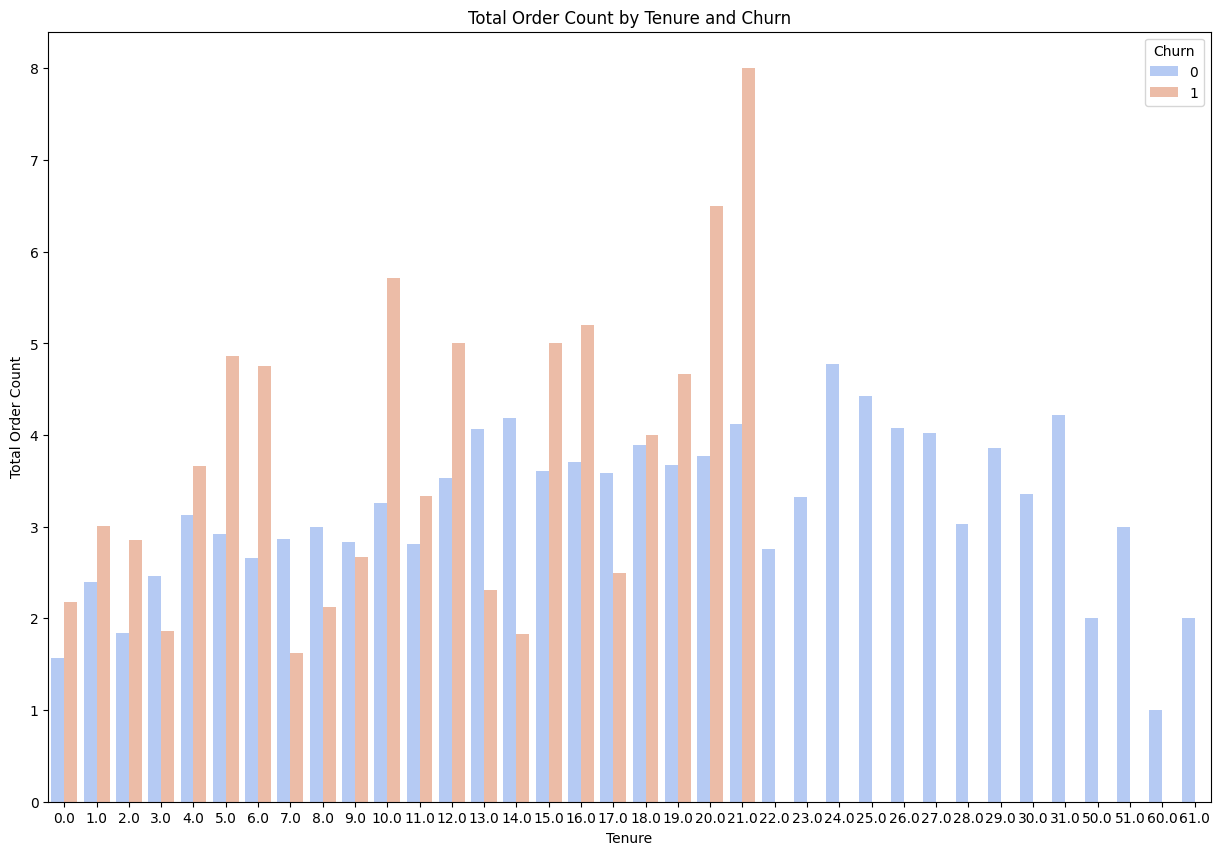

In [ ]:
# vẽ biểu đồ chia theo số tuổi mà khách hàng sử dụng dịch vụ
# (tính từ lúc tạo account tới lúc rời bỏ) -> vẽ biểu đồ

mean_order_count = df.groupby(['Tenure', 'Churn'])['OrderCount'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(15, 10))

sns.barplot(data=mean_order_count, x='Tenure', y='OrderCount', hue='Churn', palette='coolwarm')
plt.title('Total Order Count by Tenure and Churn')
plt.ylabel('Total Order Count')
plt.xlabel('Tenure')
plt.legend(title='Churn')
plt.show()

**Ở đây có thể thấy churn tập trung chủ yếu ở nhóm người dùng có tenure < 30, tuy nhiên nhóm này lại tập trung lượng order count cao. Điều đó cho thấy biến Tenure và biến Order không tương quan vào nhau nhưng lại có tính tương quan với Churn. Cho nên, công ty cần xem xét đưa ra các phương án phù hợp cho nhóm Tenure < 30 này.**

In [ ]:
# tính % phân loại giao dịch dựa trên cột PreferredPaymentMode
# import các package
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#loại bỏ các biến NaN
data = df.dropna()

# Chia cột PreferredPaymentMode thành X: đặc trưng, y: mục tiêu
X = data.drop(columns=['PreferredPaymentMode'])
y = data['PreferredPaymentMode']

# Chuyển thành mô hình nhị phân
X = pd.get_dummies(X)

# Chia data thành nhóm train để học module và nhóm test để kiểm tra
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Áp dụng RandomForestClassifier
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)

# thực hiện train trên nhóm đã chia
clf_rand.fit(x_train, y_train)

# Dự đoán
y_ranf_pre_train = clf_rand.predict(x_train)
y_ranf_pre_test = clf_rand.predict(x_test)

# Tùy chọn: đánh giá mô hình
train_accuracy = accuracy_score(y_train, y_ranf_pre_train)
test_accuracy = accuracy_score(y_test, y_ranf_pre_test)

print("Độ chính xác của Training:", train_accuracy*100)
print("Độ chính xác của Testing:", test_accuracy*100)
print("Báo cáo phân loại trên tập Test:\n", classification_report(y_test, y_ranf_pre_test))



Độ chính xác của Training: 40.778097982708935
Độ chính xác của Testing: 43.02158273381295
Báo cáo phân loại trên tập Test:
                   precision    recall  f1-score   support

              CC       0.00      0.00      0.00         5
             COD       0.00      0.00      0.00        49
Cash on Delivery       0.00      0.00      0.00         8
     Credit Card       0.00      0.00      0.00       198
      Debit Card       0.43      1.00      0.60       299
        E wallet       0.00      0.00      0.00        85
             UPI       0.00      0.00      0.00        51

        accuracy                           0.43       695
       macro avg       0.06      0.14      0.09       695
    weighted avg       0.19      0.43      0.26       695



Độ chính xác của 2 tập là xấp xỉ, có thể thấy mô hình được áp dụng khá ổn. Các phương thức giao dịch được sử dụng nhiều là Credit card và Debit Card.

In [ ]:
# tính phân loại Category
#loại bỏ các biến NaN
data = df.dropna()

# Chia cột PreferedOrderCat thành X: đặc trưng, y: mục tiêu
X = data.drop(columns=['PreferedOrderCat'])
y = data['PreferedOrderCat']

# Chuyển thành mô hình nhị phân
X = pd.get_dummies(X)

# Chia dữ liệu thành tập Train và tập Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Áp dụng RandomForestClassifier
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)

# thực hiện train trên nhóm đã chia
clf_rand.fit(x_train, y_train)

# Dự đoán trên tập hhtrain và tập tets
y_ranf_pre_train = clf_rand.predict(x_train)
y_ranf_pre_test = clf_rand.predict(x_test)

# Tùy chọn: Đánh giá mô hình
train_accuracy = accuracy_score(y_train, y_ranf_pre_train)
test_accuracy = accuracy_score(y_test, y_ranf_pre_test)

print("Độ chính xác trên tập huấn luyện:", train_accuracy*100)
print("Độ chính xác trên tập kiểm tra:", test_accuracy*100)
print("Báo cáo phân loại cho tập kiểm tra:\n", classification_report(y_test, y_ranf_pre_test))


Độ chính xác trên tập huấn luyện: 74.45965417867436
Độ chính xác trên tập kiểm tra: 74.38848920863309
Báo cáo phân loại cho tập kiểm tra:
                     precision    recall  f1-score   support

           Fashion       0.00      0.00      0.00        74
           Grocery       0.00      0.00      0.00         3
Laptop & Accessory       0.69      0.98      0.81       378
            Mobile       0.00      0.00      0.00        14
      Mobile Phone       0.95      0.65      0.78       222
            Others       0.00      0.00      0.00         4

          accuracy                           0.74       695
         macro avg       0.27      0.27      0.26       695
      weighted avg       0.68      0.74      0.69       695



Độ chính xác của 2 tập là xấp xỉ, mô hình này thực hiện khá tốt. Các mặt hàng tập trung chủ yếu ở nhóm Laptop và Mobile Phone.

Dựa vào phân loại đã tính ở trên, có thể thấp sai số giữa 2 tập là xấp xỉ. Điều đó cho thấy mô hình này được áp dụng khá tốt.
Các phương thức thanh toán như Debit Card, Credit card được sử dụng khá phổ biến vì tiện lợi, nhanh chóng. Cần được ưu tiên, nên có ác chương trình ưu đãi cho khách hàng dùng thẻ.Và cần tìm hiểu lý do khách hàng sử dụng các phương thức giao dịch khác để giảm tình trạng churn.
Ngoài 2 nhóm mặt hàng bán chạy, cần đẩy mạnh các nhóm mặt hàng khác để tạo sự đa dạng về hàng hóa.
Ưu tiên nhóm khách hàng churn, cần khảo sát nhu cầu khách hàng, tạo thêm nhiều ưu đãi cho khách mới để giữ chân. Ngoài ra, các khách hàng trung thành cần có các chương trình ưu đãi nhiều hơn.